In [1]:
import os, shutil
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Using TensorFlow backend.


# Loading Data

In [3]:
# You need to specify where's your project directory
# Laptop
pdir = '/Users/Lucas/Documents/Cours/S9 - SIIA/IML - Interactive Machine Learning/Projet_IML_Robot/Projet_IML_Robot_Detection'

# Desktop computer
#pdir = '/Users/Lucas/Desktop/IML/Projet_IML_Robot'


# The directory where you uncompressed the dogs vs cats dataset
# Laptop
original_dataset_dir = '/Users/Lucas/Documents/Cours/S9 - SIIA/IML - Interactive Machine Learning/Projet_IML_Robot/kaggle_dataset_dogs_vs_cats_uncompressed/train'

# Desktop computer
#original_dataset_dir = '/Users/Lucas/Desktop/kaggle_dataset_dogs_vs_cats_uncompressed/train'

### Creating directories

In [4]:
# Directory where you'll store your smaller dataset
base_dir = pdir+'data'
if (os.path.exists(pdir+'data'))==False:
    os.mkdir(base_dir)

# Data / Train
train_dir = os.path.join(base_dir, 'train')
if (os.path.exists(pdir+'data/train'))==False:
    os.mkdir(train_dir)

# Data / Validation
validation_dir = os.path.join(base_dir, 'validation')
if (os.path.exists(pdir+'data/validation'))==False:
    os.mkdir(validation_dir)

# Data / Test
test_dir = os.path.join(base_dir, 'test')
if (os.path.exists(pdir+'data/test'))==False:
    os.mkdir(test_dir)

# Data / Train / Cats
train_cats_dir = os.path.join(train_dir, 'cats')
if (os.path.exists(pdir+'data/train/cats'))==False:
    os.mkdir(train_cats_dir)

# # Data / Train / Dogs
train_dogs_dir = os.path.join(train_dir, 'dogs')
if (os.path.exists(pdir+'data/train/dogs'))==False:
    os.mkdir(train_dogs_dir)

# Data / Validation / Cats
validation_cats_dir = os.path.join(validation_dir, 'cats')
if (os.path.exists(pdir+'data/validation/cats'))==False:
    os.mkdir(validation_cats_dir)

# Data / Validation / Dogs  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if (os.path.exists(pdir+'data/validation/dogs'))==False:
    os.mkdir(validation_dogs_dir)

# Data / Test / Cats    
test_cats_dir = os.path.join(test_dir, 'cats')
if (os.path.exists(pdir+'data/test/cats'))==False:
    os.mkdir(test_cats_dir)

# Data / Test / Dogs   
test_dogs_dir = os.path.join(test_dir, 'dogs')
if (os.path.exists(pdir+'data/test/dogs'))==False:
    os.mkdir(test_dogs_dir)

### Copying images to training, validation, and test directories

In [5]:
# Copy the first 6250 cat images to train_cats_dir
if (os.path.exists(pdir+'data/train/cats/cat.1.jpg'))==False:
    fnames = ['cat.{}.jpg'.format(i) for i in range(6250)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_cats_dir, fname)
        shutil.copyfile(src, dst)
print('total training cat images :', len(os.listdir(train_cats_dir)))


# Copy the next 500 cat images to validation_cats_dir
if (os.path.exists(pdir+'data/validation/cats/cat.1000.jpg'))==False:
    fnames = ['cat.{}.jpg'.format(i) for i in range(6250, 9375)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_cats_dir, fname)
        shutil.copyfile(src, dst)
print('total validation cat images :', len(os.listdir(validation_cats_dir)))


# Copy the next 500 cat images to test_cats_dir
if (os.path.exists(pdir+'data/test/cats/cat.1500.jpg'))==False:
    fnames = ['cat.{}.jpg'.format(i) for i in range(9375, 12500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_cats_dir, fname)
        shutil.copyfile(src, dst)
print('total test cat images :', len(os.listdir(test_cats_dir)))


# Copy the first 1000 dog images to train_dogs_dir
if (os.path.exists(pdir+'data/train/dogs/dog.1.jpg'))==False:
    fnames = ['dog.{}.jpg'.format(i) for i in range(6250)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(train_dogs_dir, fname)
        shutil.copyfile(src, dst)
print('total training dog images :', len(os.listdir(train_dogs_dir)))


# Copy the next 500 dog images to validation_dogs_dir
if (os.path.exists(pdir+'data/validation/dogs/dog.1000.jpg'))==False:
    fnames = ['dog.{}.jpg'.format(i) for i in range(6250, 9375)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(validation_dogs_dir, fname)
        shutil.copyfile(src, dst)
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

    
# Copy the next 500 dog images to test_dogs_dir
if (os.path.exists(pdir+'data/test/dogs/dog.1500.jpg'))==False:
    fnames = ['dog.{}.jpg'.format(i) for i in range(9375, 12500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(test_dogs_dir, fname)
        shutil.copyfile(src, dst)
print('total test dog images :', len(os.listdir(test_dogs_dir)))

total training cat images : 6250
total validation cat images : 3125
total test cat images : 3125
total training dog images : 6250
total validation dog images : 3125
total test dog images : 3125


# Data Preprocessing

In [6]:
# Number of samples per dataset
train_samples_nb = len(os.listdir(train_dogs_dir)) + len(os.listdir(train_cats_dir))
val_samples_nb = len(os.listdir(validation_dogs_dir)) + len(os.listdir(validation_cats_dir))
test_samples_nb = len(os.listdir(test_dogs_dir)) + len(os.listdir(test_cats_dir))
print('# Train samples :', train_samples_nb)
print('# Validation samples :', val_samples_nb)
print('# Test samplles :', test_samples_nb)

# Image Resolution
img_width = 150
img_height = 150
print('Image resolution :', img_width, 'x', img_height)

# Define the numbers of samples per batch
batch_size = 50
print('Batch size :', batch_size)

# Number of epochs
epochs = 100
print('Number of epochs :', epochs)

# Train samples : 12500
# Validation samples : 6250
# Test samplles : 6250
Image resolution : 150 x 150
Batch size : 50
Number of epochs : 100


In [7]:
# Data Augmentation and rescaling it
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Test/Validation data are obviously not augmented
test_datagen = ImageDataGenerator(rescale=1./255)

# Generating train data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height), # Resizes the data
    batch_size=batch_size, # Making 50-samples batches
    class_mode='binary')

# Generating validation data 
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height), 
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False) # We want the samples to have the same order to calculate confusion matrix

Found 12500 images belonging to 2 classes.
Found 6250 images belonging to 2 classes.


### Instantiating a Convnet

In [8]:
# Model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

# We ended the network with a single sigmoid unit, so we'll use binary crossentropy as the loss
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Fitting the model

In [12]:
# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples_nb // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=val_samples_nb // batch_size)

Epoch 1/100
250/250 [==============================] - 70s 282ms/step - loss: 0.6786 - acc: 0.5671 - val_loss: 0.6449 - val_acc: 0.6283
Epoch 2/100
250/250 [==============================] - 73s 291ms/step - loss: 0.6509 - acc: 0.6178 - val_loss: 0.6323 - val_acc: 0.6318
Epoch 3/100
250/250 [==============================] - 70s 281ms/step - loss: 0.6328 - acc: 0.6397 - val_loss: 0.5803 - val_acc: 0.6979
Epoch 4/100
250/250 [==============================] - 71s 284ms/step - loss: 0.6060 - acc: 0.6686 - val_loss: 0.5463 - val_acc: 0.7200
Epoch 5/100
250/250 [==============================] - 71s 284ms/step - loss: 0.5874 - acc: 0.6846 - val_loss: 0.5307 - val_acc: 0.7358
Epoch 6/100
250/250 [==============================] - 70s 282ms/step - loss: 0.5718 - acc: 0.6991 - val_loss: 0.5396 - val_acc: 0.7174
Epoch 7/100
250/250 [==============================] - 71s 283ms/step - loss: 0.5618 - acc: 0.7089 - val_loss: 0.5118 - val_acc: 0.7469
Epoch 8/100
250/250 [===========================

Epoch 61/100
250/250 [==============================] - 68s 273ms/step - loss: 0.3035 - acc: 0.8684 - val_loss: 0.2992 - val_acc: 0.8747
Epoch 62/100
250/250 [==============================] - 69s 276ms/step - loss: 0.3025 - acc: 0.8691 - val_loss: 0.3039 - val_acc: 0.8806
Epoch 63/100
250/250 [==============================] - 68s 274ms/step - loss: 0.3050 - acc: 0.8729 - val_loss: 0.2614 - val_acc: 0.8926
Epoch 64/100
250/250 [==============================] - 69s 275ms/step - loss: 0.3064 - acc: 0.8679 - val_loss: 0.2723 - val_acc: 0.8854
Epoch 65/100
250/250 [==============================] - 68s 274ms/step - loss: 0.3015 - acc: 0.8725 - val_loss: 0.2838 - val_acc: 0.8827
Epoch 66/100
250/250 [==============================] - 69s 276ms/step - loss: 0.2901 - acc: 0.8780 - val_loss: 0.2641 - val_acc: 0.8888
Epoch 67/100
250/250 [==============================] - 69s 274ms/step - loss: 0.2986 - acc: 0.8726 - val_loss: 0.2516 - val_acc: 0.8957
Epoch 68/100
250/250 [===================

In [13]:
# saving the model
model.save('catvdog_full_100_epochs.h5')

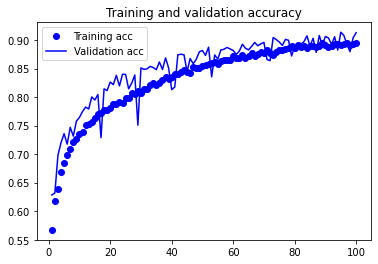

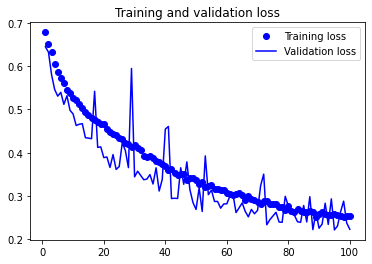

In [14]:
# Displaying curbes of loss and accuracy during training
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()